# Boeing Stock Analysis

The Boeing corporation is one of the largest manufacturers in the United States. It makes up a significant percentage of American exports and is one of the biggest contributors to the Defense Department. How have the stocks of this company fared over the last year? What was the change in price for this company's stocks? What was the daily return of the stock on average? Does Boeing stock correlate with the daily returns of other aerospace companies? What about their closing prices? What do you risk by investing in Boeing stock?

In [9]:
#Imports
import warnings
warnings.simplefilter('ignore',FutureWarning)

#For Data Analysis:
import pandas as pd
import numpy as np
import datetime 
import pandas_datareader as pdr
from pandas_datareader import data, wb
from pandas import Series,DataFrame

In [10]:
#For visualization:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(15,9)

Populating the interactive namespace from numpy and matplotlib


In [11]:
#Set the date range
start = datetime.datetime(2016,3,1)
end = datetime.datetime(2017,3,1)

In [12]:
#Collect financial data from the web

boeing = pdr.get_data_yahoo('BA',start,end)

lockheedMartin = pdr.get_data_yahoo('LMT',start,end)

northropGrumman = pdr.get_data_yahoo('NOC',start,end)

In [13]:
type(boeing)

pandas.core.frame.DataFrame

In [14]:
boeing.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-03-01,119.010002,120.989998,118.250000,119.959999,4595400,116.113313
2016-03-02,119.629997,120.750000,118.500000,119.650002,4292500,115.813256
2016-03-03,118.839996,119.730003,118.250000,119.610001,3404600,115.774538
2016-03-04,120.169998,122.230003,119.849998,121.070000,4421500,117.187720
2016-03-07,120.800003,123.320000,120.570000,122.900002,4504700,118.959040


In [15]:
boeing.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-23,175.970001,177.000000,175.699997,176.860001,3442300,176.860001
2017-02-24,176.750000,178.800003,176.100006,177.440002,4169900,177.440002
2017-02-27,178.000000,179.880005,177.550003,179.429993,2831000,179.429993
2017-02-28,180.339996,181.929993,179.669998,180.229996,4761700,180.229996
2017-03-01,181.850006,184.800003,181.820007,183.910004,5350700,183.910004


In [16]:
boeing.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,139.677945,140.885850,138.727194,139.897312,3.801123e+06,137.428903
std,14.057240,14.134283,14.099061,14.161598,1.472321e+06,15.139754
min,118.839996,119.730003,118.250000,119.610001,9.623000e+05,115.774538
25%,130.839996,131.600006,129.809998,130.740005,2.831000e+06,126.965097
50%,133.190002,134.490005,132.419998,133.289993,3.514800e+06,130.477452
75%,149.830002,150.809998,149.029999,150.039993,4.490900e+06,148.760373
max,181.850006,184.800003,181.820007,183.910004,1.327200e+07,183.910004


In [17]:
boeing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-03-01 to 2017-03-01
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [18]:
#Dataframe of the closing prices of all the companies together

closing_df = pdr.get_data_yahoo(['BA','LMT','NOC'],start,end)['Adj Close']

In [19]:
closing_df.head()

,BA,LMT,NOC
Date,,,
2016-03-01,116.113313,212.241897,190.859204
2016-03-02,115.813256,211.336993,190.307932
2016-03-03,115.774538,212.621369,189.126617
2016-03-04,117.187720,212.815967,188.092989
2016-03-07,118.959040,210.013704,183.771374


### Stock Performance

How has Boeing stock performed over the last year?

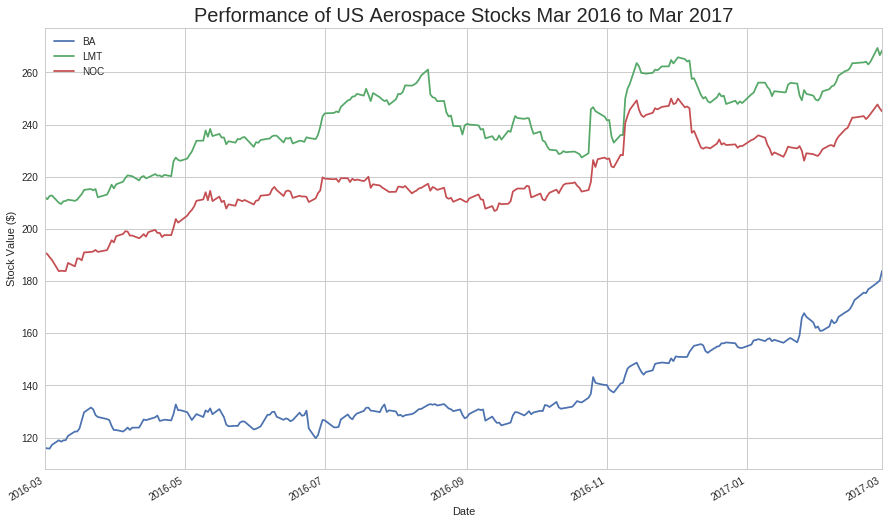

In [20]:
closing_plot = closing_df.plot(grid=True)

closing_plot.set_title('Performance of US Aerospace Stocks Mar 2016 to Mar 2017', fontsize=20)

closing_plot.set_ylabel('Stock Value ($)')

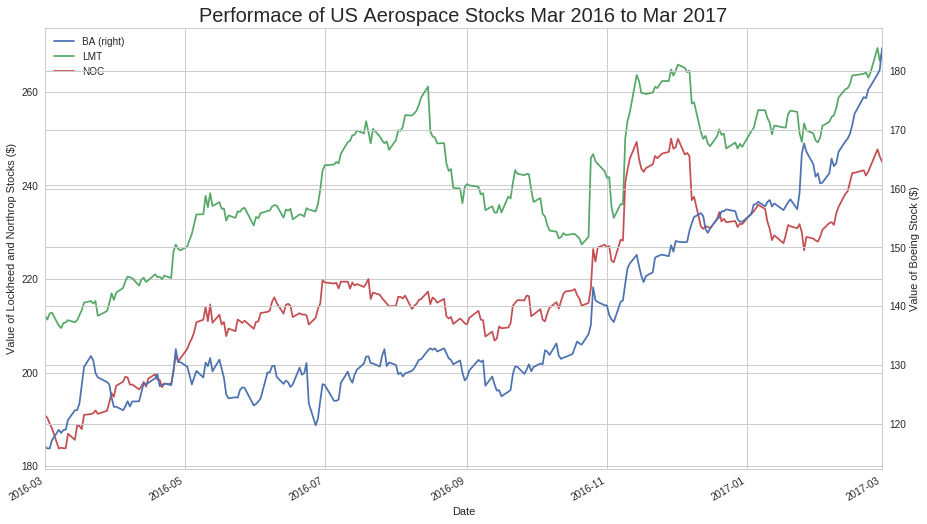

In [21]:
closing_secondary = closing_df.plot(secondary_y = ['BA'],grid=True)

closing_secondary.set_title('Performace of US Aerospace Stocks Mar 2016 to Mar 2017',fontsize=20)

closing_secondary.set_ylabel('Value of Lockheed and Northrop Stocks ($)')

closing_secondary.right_ax.set_ylabel('Value of Boeing Stock ($)')

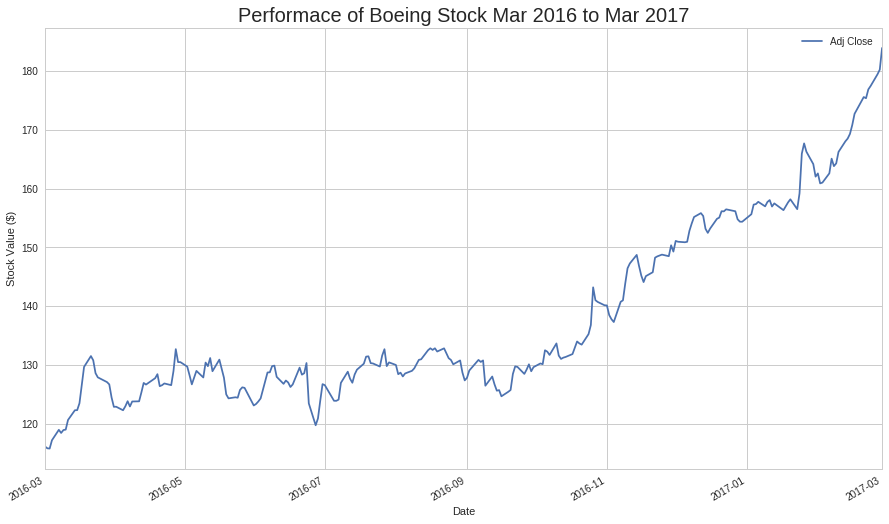

In [22]:
boeing_stock = boeing['Adj Close'].plot(legend=True,grid=True)

boeing_stock.set_title('Performace of Boeing Stock Mar 2016 to Mar 2017',fontsize=20)

boeing_stock.set_ylabel('Stock Value ($)')

Boeing stock had great performance over the last 12 months. Its value increased by about 52.8%.

Boeing stock performed similarly to its competitors. They all accrued much more stock value over this 12 month period. While still worth less than Lockheed and Northrop, Boeing did not experience the same dramatic stock drops they did, such as in September and December.

### Volume 

What was the volume of Boeing stock traded over this time period?

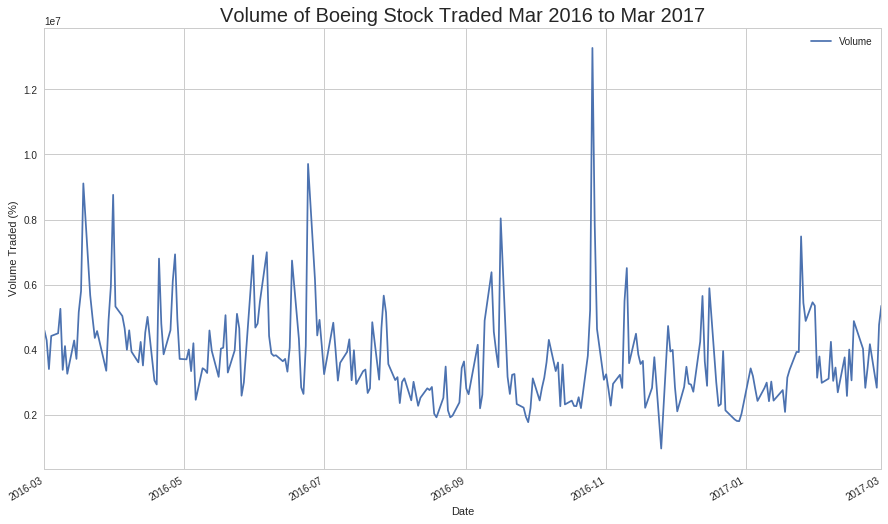

In [23]:
boeing_volume = boeing['Volume'].plot(legend=True,grid=True)

boeing_volume.set_title('Volume of Boeing Stock Traded Mar 2016 to Mar 2017',fontsize=20)

boeing_volume.set_ylabel('Volume Traded (%)')

Boeing stock saw strong spikes in trade volume in March, April, June and October. This corresponds with several strong spikes in returns.

### Stock Growth

If March 2016 is set as a baseline, what does a visualization of the stock growth look like?

In [24]:
stock_return = closing_df.apply(lambda x : x / x[0])
stock_return.head()

,BA,LMT,NOC
Date,,,
2016-03-01,1.000000,1.000000,1.000000
2016-03-02,0.997416,0.995736,0.997112
2016-03-03,0.997082,1.001788,0.990922
2016-03-04,1.009253,1.002705,0.985507
2016-03-07,1.024508,0.989502,0.962864


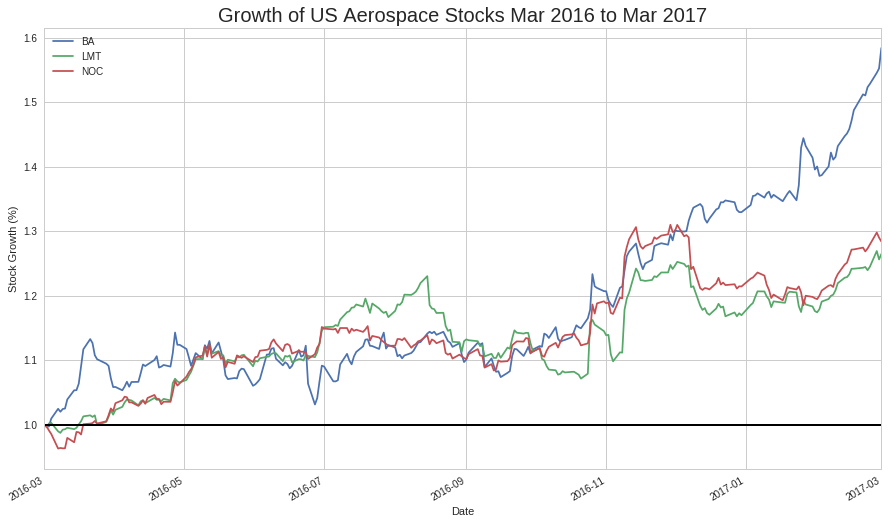

In [25]:
growth = stock_return.plot(grid=True)

growth.axhline(y=1,color='black',lw=2)

growth.set_title('Growth of US Aerospace Stocks Mar 2016 to Mar 2017',fontsize=20)

growth.set_ylabel('Stock Growth (%)')

This illustrates just how competitive Boeing is in the industry. Boeing's growth closely matched that of their competition. Lockheed and Northrop stock both tumbled in December while Boeing's continues to increase in value. That coincides with several tweets President Trump made about the aerospace industry around that time.

### Trump Tweets

How did this stock behave during President elect Donal Trump's aerospace industry tweets?

Trump Shocks

Dec 6 Trump Tweet - Air Force 1 "costs out of control" 

Dec 21 Trump Meeting w/ Defense Aerospace CEOs

Dec 22 Trump Tweet - Boeing to price out F-35 with comparable(?) F-18

Jan 18 Trump Boeing CEO Meeting

Feb 17 Trump visits Boeing plant

CHECK FOR MORE!!!

In [26]:
#Grab date range 

#set the new date range

short_start = datetime.datetime(2016,12,1)
short_end = datetime.datetime(2017,2,28)

In [27]:
#Collect information for new, shorter df to look at Trump's interference

short_boeing = pdr.get_data_yahoo('BA',short_start,short_end)

In [28]:
#Make a df of the closing prices with the new shorter df

short_closing_df = pdr.get_data_yahoo(['BA'],short_start,short_end)['Adj Close']

In [29]:
short_closing_df

,BA
Date,
2016-12-01,151.090337
2016-12-02,150.951531
2016-12-05,150.862302
2016-12-06,150.941622
2016-12-07,152.825412
2016-12-08,154.064751
2016-12-09,155.155376
2016-12-12,155.819660
2016-12-13,155.323924


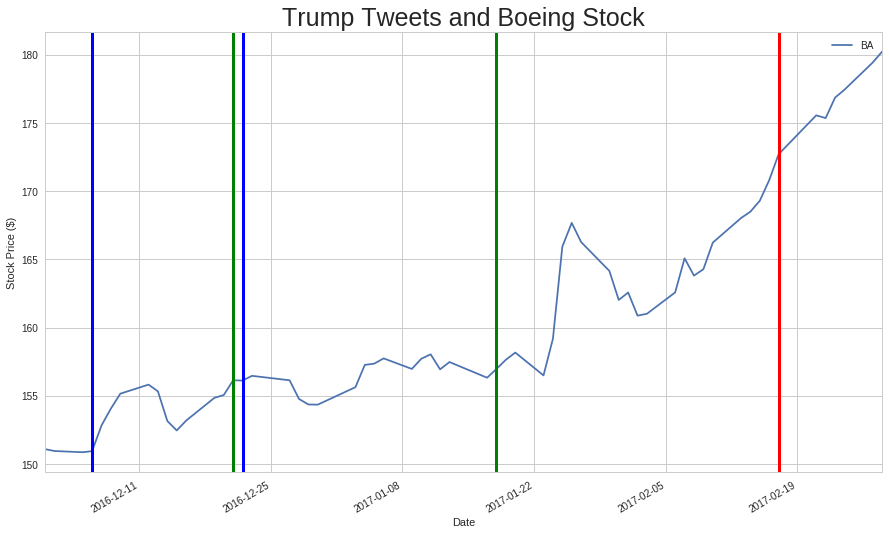

In [30]:
#Let's add markers to the closing dates

#Blue = Trump Tweet
#Green = Trump CEO Meeting 
#Red = Trump Visit

short_stock_return_plot = short_closing_df.plot(grid=True)

short_stock_return_plot.set_title('Trump Tweets and Boeing Stock', fontsize=25)

short_stock_return_plot.set_ylabel('Stock Price ($)')

plt.axvline(x='2016-12-06',linewidth=3,color='blue')

plt.axvline(x='2016-12-21',linewidth=3,color='green')

plt.axvline(x='2016-12-22',linewidth=3,color='blue')

plt.axvline(x='2017-1-18',linewidth=3,color='green')

plt.axvline(x='2017-2-17',linewidth=3,color='red')

Boeing stock imporved while Trump was tweeting. It can be concluded that his tweets directed at Boeing did not hurt its stocks.

### Moving Averages

What are the moving averages of the Boeing stock?

In [31]:
#Moving Average

ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    boeing[column_name] = pd.rolling_mean(boeing['Adj Close'],ma)

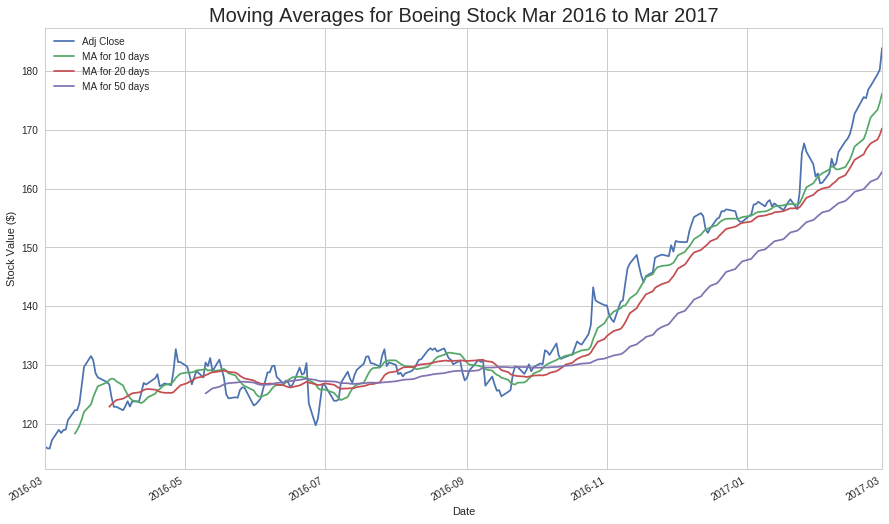

In [32]:
#Plot the moving averages

#Setting subplot to false gets all the plots in one figure

ma_plot = boeing[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False)

ma_plot.set_title('Moving Averages for Boeing Stock Mar 2016 to Mar 2017',fontsize=20)

ma_plot.set_ylabel('Stock Value ($)')

All the moving averages for this stock are trending up. The 10 and 20 day averages last crossed over the 50 day average in October and continued to grow ever since. This indicates a bullish stock.

### Returns

What do the day to day returns of Boeing stock look like graphically over this period?

In [33]:
#Daily Returns

boeing['Daily Return'] = boeing['Adj Close'].pct_change()

lockheedMartin['Daily Return'] = lockheedMartin['Adj Close'].pct_change()

northropGrumman['Daily Return'] = northropGrumman['Adj Close'].pct_change()

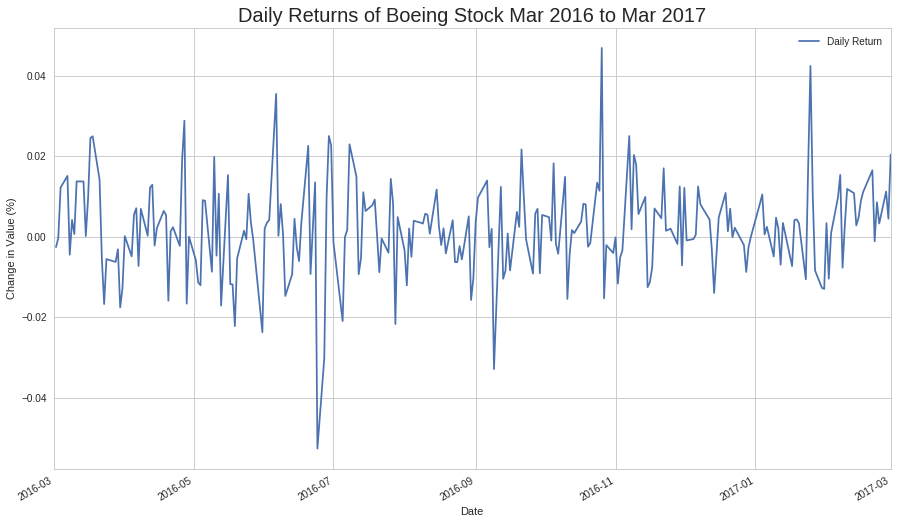

In [34]:
boeing_return = boeing['Daily Return'].plot(legend=True,linestyle='-')

boeing_return.set_title('Daily Returns of Boeing Stock Mar 2016 to Mar 2017',fontsize=20)

boeing_return.set_ylabel('Change in Value (%)')

The daily returns for Boeing stock exceeded 2% 14 times, while it exceeded -2% 7 times. Boeing stock grew twice as often as it lost value. The largest negative spike occurred in June and the largest positive spike occurred in October.

### Value at risk using the 'bootstrap' method

For this method, empirical quantiles will be calculated from a histogram of daily returns. Quantiles help define the confidence interval.

/home/nova/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


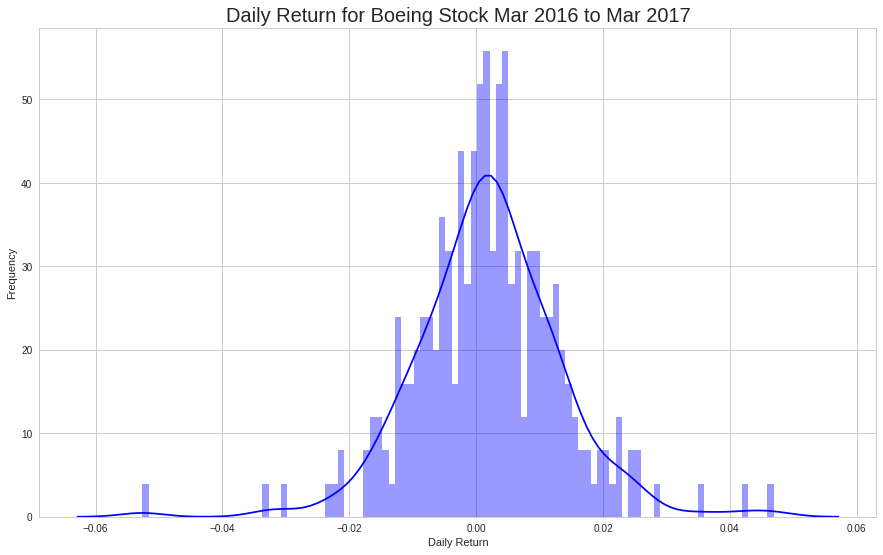

In [35]:
f = sns.distplot(boeing['Daily Return'].dropna(),bins=100,color='blue')

f.set(ylabel='Frequency')

plt.title('Daily Return for Boeing Stock Mar 2016 to Mar 2017',fontsize=20)

### Industry Correlations

Is the performance of Boeing stock correlated with other stocks? Do the value points of their stocks move in the same direction?  To investigate correlation, this analysis will utilize aerospace stocks’ daily returns and closing prices.

What are the correlation coefficients for the daily returns?

In [36]:
#Aerospace Returns DataFrame

aero_rets = closing_df.pct_change()

In [37]:
aero_rets.head(10)

,BA,LMT,NOC
Date,,,
2016-03-01,NaN,NaN,NaN
2016-03-02,-0.002584,-0.004264,-0.002888
2016-03-03,-0.000334,0.006077,-0.006207
2016-03-04,0.012206,0.000915,-0.005465
2016-03-07,0.015115,-0.013168,-0.022976
2016-03-08,-0.004475,-0.002317,0.000964
2016-03-09,0.004168,0.004969,-0.000642
2016-03-10,0.000651,0.000693,0.000054
2016-03-11,0.013746,0.002263,0.016814


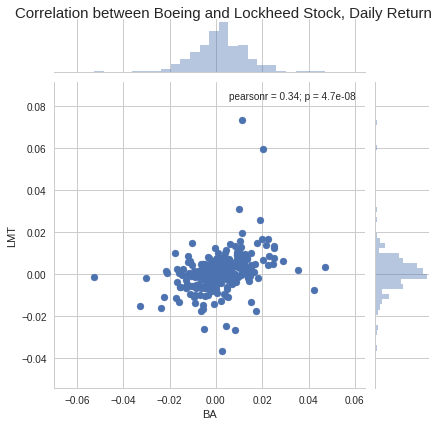

In [38]:
#Compare returns of two stocks to see how correlated they are

a = sns.jointplot('BA','LMT',aero_rets,kind='scatter')

plt.subplots_adjust(top=0.95)

a.fig.suptitle('Correlation between Boeing and Lockheed Stock, Daily Return',fontsize=15)

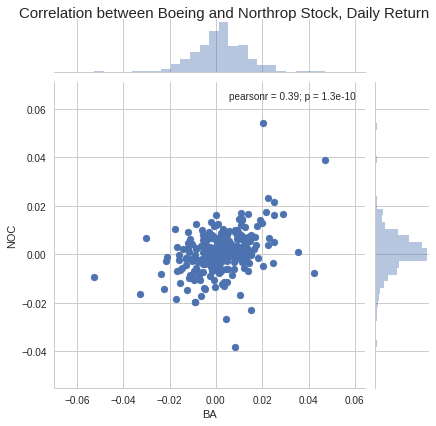

In [39]:
b = sns.jointplot('BA','NOC',aero_rets,kind='scatter')

plt.subplots_adjust(top=0.95)

b.fig.suptitle('Correlation between Boeing and Northrop Stock, Daily Return',fontsize=15)

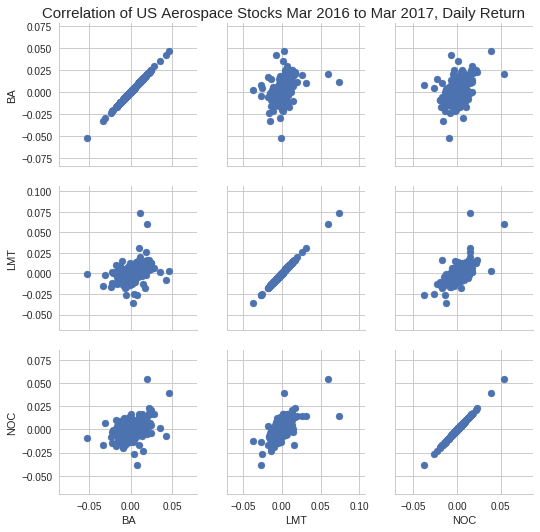

In [40]:
#Pairgrid

g = sns.PairGrid(aero_rets,dropna=True)

plt.subplots_adjust(top=0.95)

g.map(plt.scatter)

g.fig.suptitle('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Daily Return',fontsize=15)

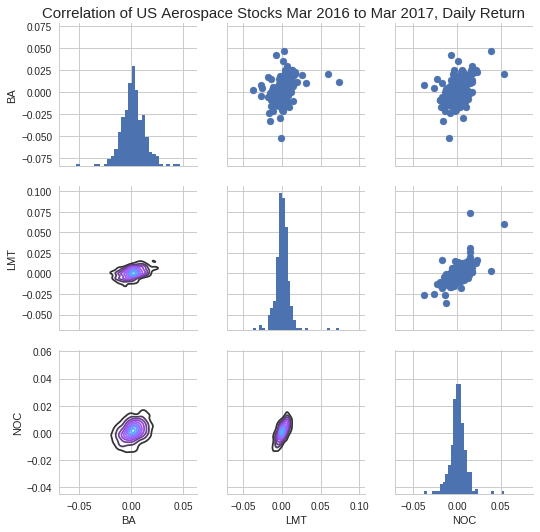

In [41]:
returns_fig = sns.PairGrid(aero_rets.dropna())

plt.subplots_adjust(top=0.95)

returns_fig.map_upper(plt.scatter,cmap='blue')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

returns_fig.fig.suptitle('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Daily Return',fontsize=15)

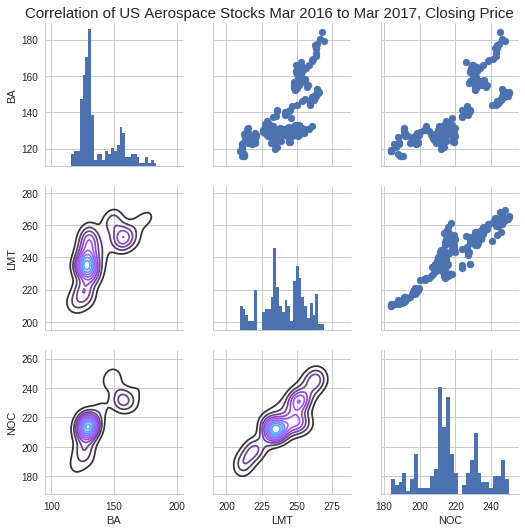

In [42]:
returns_fig = sns.PairGrid(closing_df.dropna())

plt.subplots_adjust(top=0.95)

returns_fig.map_upper(plt.scatter,cmap='blue')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

returns_fig.fig.suptitle('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Closing Price',fontsize=15)

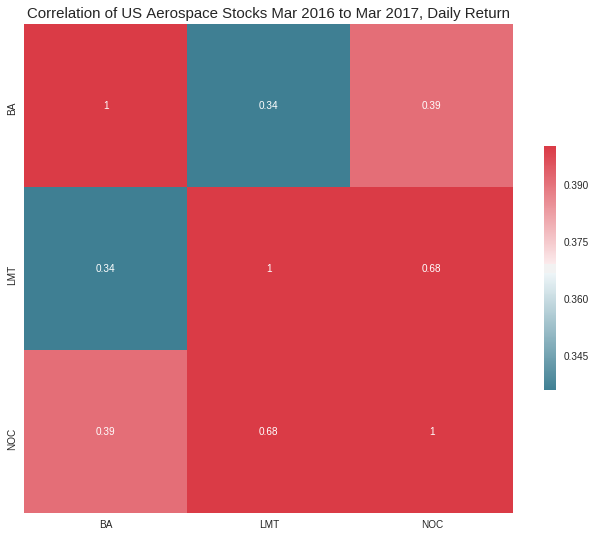

In [43]:
#Correlation heatmap, to get the numerical values for the correlation

#Compute the correlation matrix
corr = aero_rets.corr()

#Set up the matplotlib figure
f,ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
h = sns.heatmap(corr,cmap=cmap,vmax=0.4,square=True,annot=True,cbar_kws={'shrink':0.5},ax=ax)

h.set_title('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Daily Return',fontsize=15)

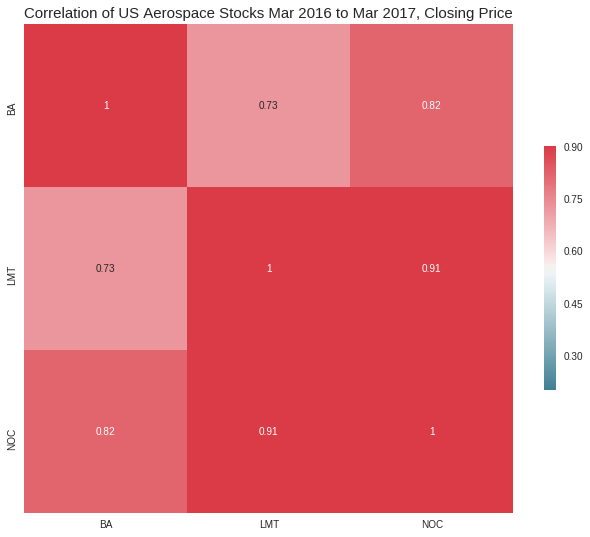

In [44]:
#Correlation heatmap, to get the numerical values for the correlation

#Compute the correlation matrix
corr = closing_df.corr()

#Set up the matplotlib figure
f,ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
h = sns.heatmap(corr,cmap=cmap,vmin=0.2,vmax=0.9,square=True,annot=True,cbar_kws={'shrink':0.5},ax=ax)

h.set_title('Correlation of US Aerospace Stocks Mar 2016 to Mar 2017, Closing Price',fontsize=15)

A coefficient of .45 or greater represents a moderate to strong positive correlation while anything between a .45 and 0 represents a weak positive correlation.

The heatmap above depicts moderate to strong correlation in red and a weak correlation in blue. Lockheed and Northrop have the strongest correlations, while Lockheed and Boeing have the weakest.

Lockheed and Northrop have tight scatter and KDE plots that are also fairly linear. This illustrates their higher co-linearity.  

The Boeing correlations are a bit more nebulous which is indicative of a weak correlation.

All the stock closing prices have a high correlation. Lockheed and Northrop have the highest correlation.

The scatter and KDE plots show a positive linear relationship between Lockheed and Northrop, as the data comes close to forming a straight line. The Boeing plots are less linear.

### Risk

What are the risks involved in investing in Boeing stocks?

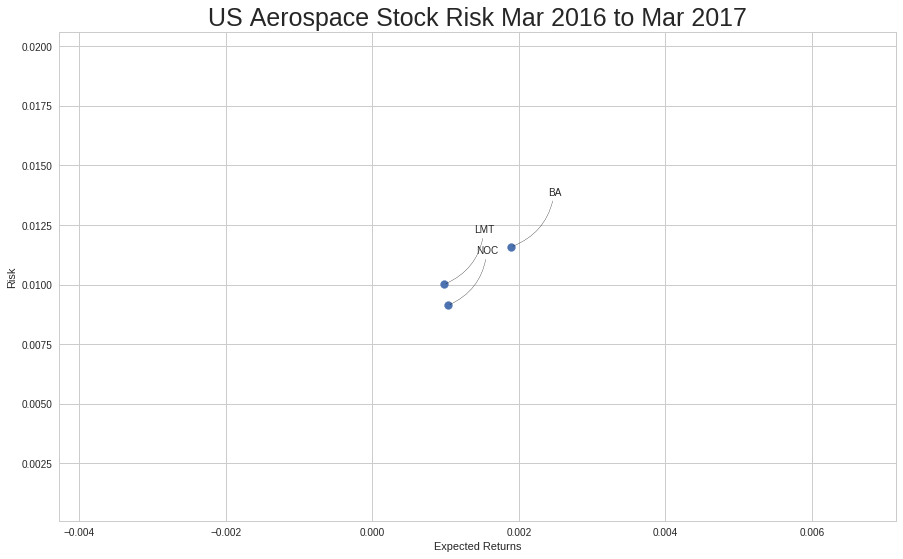

In [45]:
# Define new df
rets = aero_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

#Set the plot axis titles

plt.title('US Aerospace Stock Risk Mar 2016 to Mar 2017',fontsize=25)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

#Label the scatter plots

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y), xytext=(50,50),
    textcoords = 'offset points', ha = 'right', va='bottom',
    arrowprops = dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

Investing in Boeing is slightly riskier than some other related firms but the expected returns are higher as well.


### Value at Risk

This analysis will treat 'value at risk' as the amount of money we could expect to lose (put at risk) for a given confidence interval.


### Value at risk using the 'bootstrap' method

For this method we will calculate the empirical quantile from a histogram of daily returns. Quantiles will help us define our confidence interval.

/home/nova/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


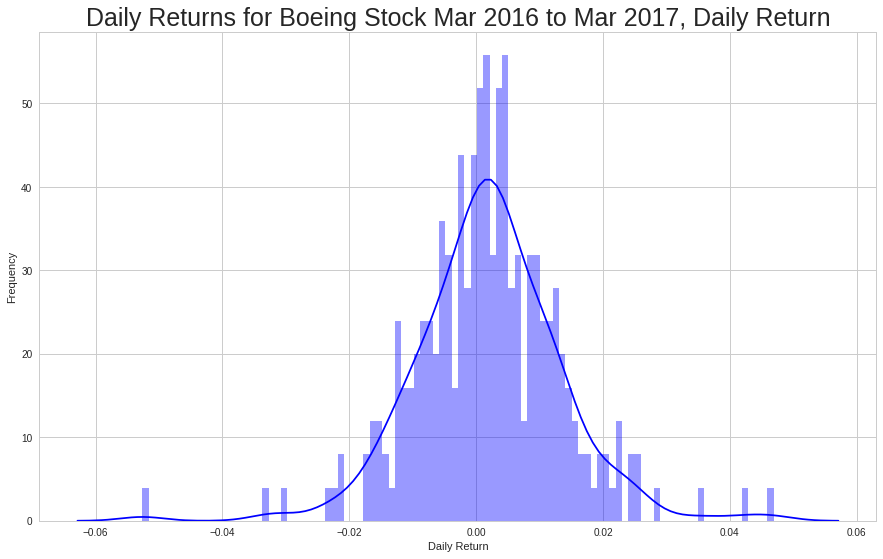

In [46]:
j = sns.distplot(boeing['Daily Return'].dropna(),bins=100,color='blue')

j.set(ylabel='Frequency')

plt.title('Daily Returns for Boeing Stock Mar 2016 to Mar 2017, Daily Return',fontsize=25)

In [47]:
#Use quantile to get the risk value for the stock

print("The empirical quantile of daily returns is: ")

#The 0.05 empirical quantile of daily returns
rets['BA'].quantile(0.05)


The empirical quantile of daily returns is: 


-0.015579350347648062

The worst daily loss for Boeing Stock will not exceed 1.6%. This can be said with a 95% confidence. If an investor bought 1 million dollars in Boeing stock, their one-day 5% VaR (value at risk) is 0.016 * 1,000,000 = $16,000.

### Monte Carlo Simulation

Next, this analysis will use the Monte Carlo method to simulate potential future stock prices. It will run many trials with random market conditions, then will calculate portfolio losses for each trial. The aggregation of these losses can be used to determine how risky the stock is.

In [48]:
#Set up the time horizon
days = 365

#Now our delta
dt=1/days

#Now grab our mu (drift) from the expected return data we got for BA
mu= rets.mean()['BA']

#Now grab the volatility of the stock from the std of the average return 
sigma = rets.std()['BA']

In [49]:
#Create a function that takes in the starting price and number of days,
#and uses the sigma and mu already calculated from our daily returns

def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation, mu, sigma and returns a simulation price array'''
    
    #Define a price array with the same number of 0s as days you want to study
    price = np.zeros(days)
    price[0] = start_price
    
    #Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #Run price array for number of days
    for x in range(1,days):
        
        #Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt,scale=sigma * np.sqrt(dt))
        #Calculate Drift
        drift[x] = mu * dt
        #Calculate Price
        price[x] = price[x-1] + (price[x-1] *(drift[x] + shock[x]))
        
    return price
        

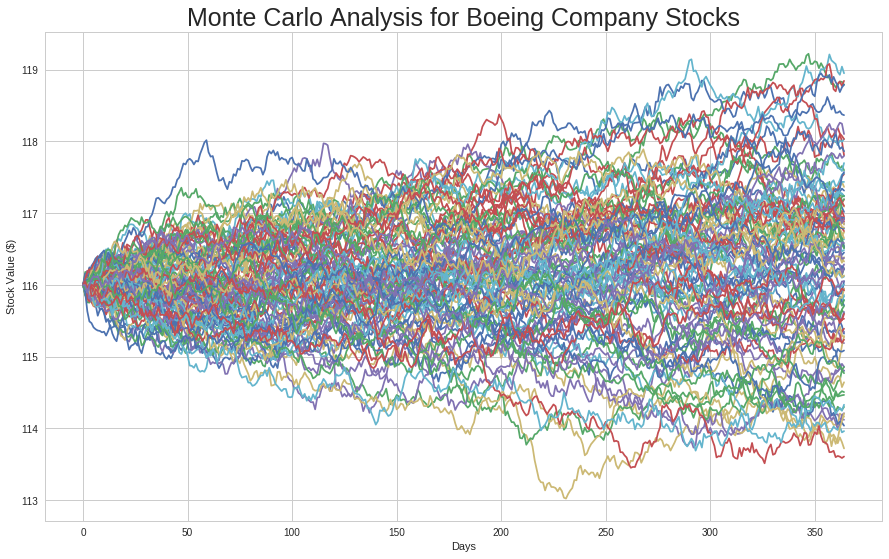

In [50]:
#Put the function to work

#Get start price from stock.head() or boeing.head()

start_price = 116.00

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Stock Value ($)')
plt.title('Monte Carlo Analysis for Boeing Company Stocks',fontsize=25)

In [51]:
#Make a histogram of the end results 

#Set a large number of runs
runs= 10000

#Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

#Set the print options of numpy to only displace 0-5 points from an array to supress output
np.set_printoptions(threshold=5)

for run in range(runs):
    
    #Set the simulation data point as the last stock price for that run
    #This is basically creting an array of all the last stock prices for all 10000 runs
    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

The simulations can be used to plot a histogram with a quantile to define the stock's risk.

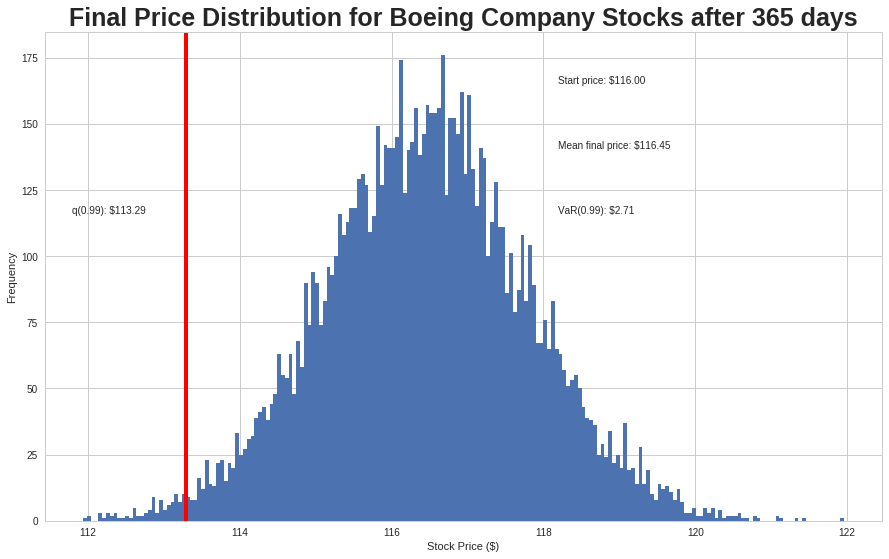

In [52]:
#Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between her
q = np.percentile(simulations,1)

#Plot the distribution of the end prices
plt.hist(simulations,bins=200)

#Using plt.figtext to fill in some additional information onto the plot

#Starting price
plt.figtext(0.6,0.8, s = 'Start price: $%.2f' % start_price)

#Mean ending price
plt.figtext(0.6,0.7, 'Mean final price: $%.2f' % simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,'VaR(0.99): $%.2f' % (start_price - q),)

#Display 1% quatile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' % q)

#Plot a line at the 1% quantile
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u'Final Price Distribution for Boeing Company Stocks after %s days' % days, weight='bold',fontsize=25)

plt.ylabel('Frequency')

plt.xlabel('Stock Price ($)')

This analysis has looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Boeing stock, which is 2.71 dollars for every investment of $116 (the price of the initial Boeing stock).

This means that for every stock (equal to the initial stock price) that an investor bought, they'd be putting about 2.71 dollars at risk 99 percent of the time, based on the Monte Carlo Simulation.

### Conclusions

Boeing stocks have performed well over the last 12 months, with growth exceeding the competition. Value at risk for investing in this stock is low and its been experiencing a bullish upswing since October. If current trends are any indication, such as the moving averages suggest, then Boeing stock will continue to be a top performer.